# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In this Dataset Loan_Status is the target variable, which is discrete integer values. We will use Regression method to predict the Loan_status.

# Performing EDA

In [4]:
#checking the shape
df.shape

(614, 13)

In [5]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

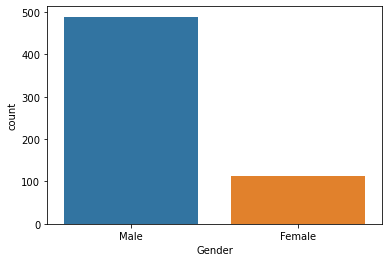

In [8]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

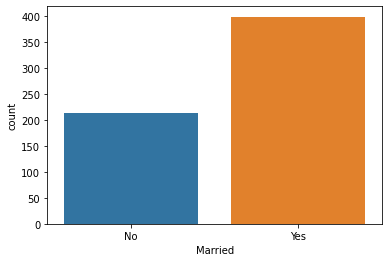

In [9]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

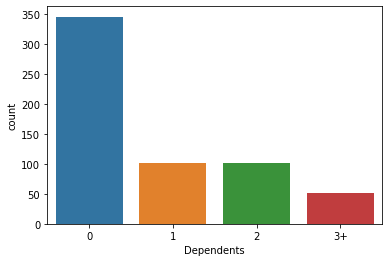

In [10]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

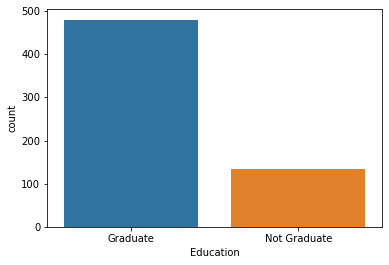

In [11]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

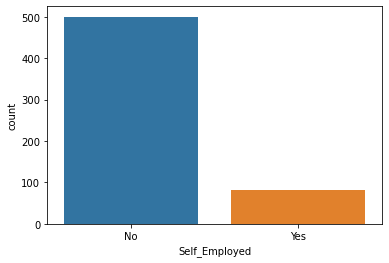

In [12]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

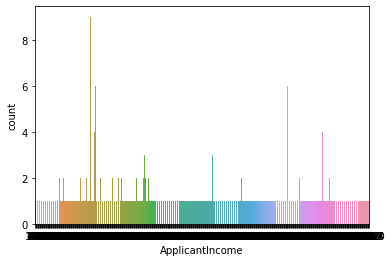

In [13]:
sns.countplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

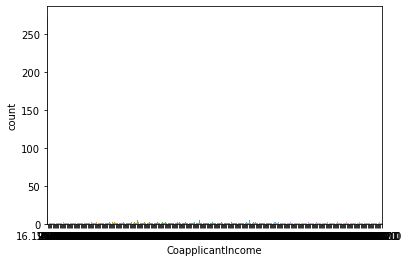

In [14]:
sns.countplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

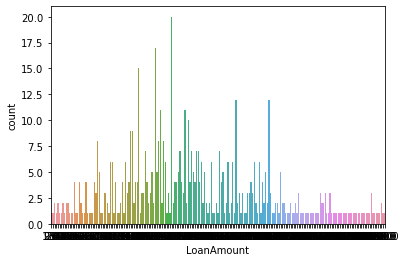

In [15]:
sns.countplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

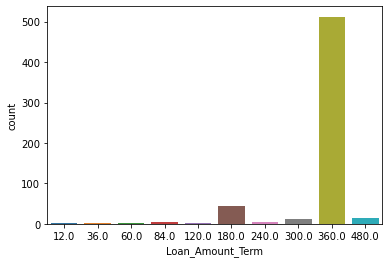

In [16]:
sns.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

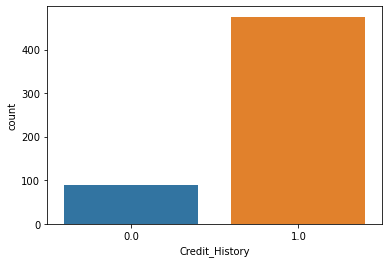

In [17]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

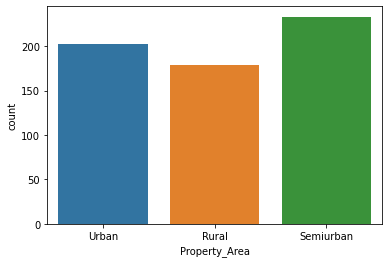

In [18]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

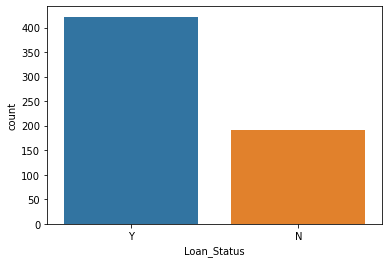

In [19]:
sns.countplot(df['Loan_Status'])

# Checking Null Values

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

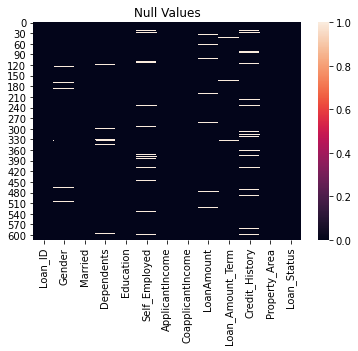

In [21]:
#Graphical representation
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are null values in multiple columns. we will fill those null values.

In [22]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, There is no null values in our dataset.

# Checking Correlation

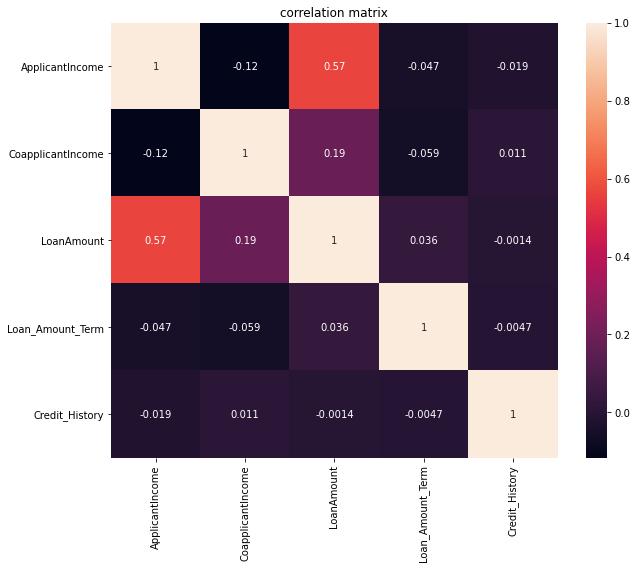

In [25]:
dfcor=df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(dfcor,annot=True)
plt.title("correlation matrix")
plt.show()

Our data is co-related.

In [26]:
#Dropping useless features - Loan_ID
df = df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


We can see we have outliers in our dataset.

In [27]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [29]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [30]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [31]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [32]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [34]:
#Splitting the independent and target variables in x and y
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [35]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [36]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [37]:
x.shape

(614, 11)

In [38]:
y.shape

(614,)

ApplicantIncome         AxesSubplot(0.125,0.536818;0.110714x0.343182)
CoapplicantIncome    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
LoanAmount           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Loan_Amount_Term     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Credit_History       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

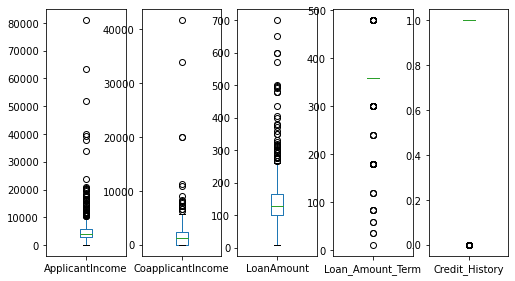

In [39]:
x.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

We can see we have outliers in our dataset

In [40]:
#removing outliers
from scipy.stats import zscore

In [41]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

x['Gender'] = x['Gender'].replace(gender_stat)
x['Married'] = x['Married'].replace(yes_no_stat)
x['Dependents'] = x['Dependents'].replace(dependents_stat)
x['Education'] = x['Education'].replace(education_stat)
x['Self_Employed'] = x['Self_Employed'].replace(yes_no_stat)
x['Property_Area'] = x['Property_Area'].replace(property_stat)

In [42]:
z=np.abs(zscore(x))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.2732313 , 0.41173269,
        0.10798877],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.2732313 , 0.41173269,
        1.33586108],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.2732313 , 0.41173269,
        0.10798877],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.2732313 , 0.41173269,
        0.10798877],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.2732313 , 0.41173269,
        0.10798877],
       [2.11710719, 1.37208932, 0.73780632, ..., 0.2732313 , 2.42876026,
        1.11988354]])

In [43]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [44]:
x.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [45]:
#Splitting the data into train and validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [46]:
print(x_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
398       1        0           0          0              0             3902   
190       1        0           0          0              0             4885   
216       1        1           0          1              0              150   
470       1        1           1          1              1             3450   
140       1        1           2          1              0             5042   
..      ...      ...         ...        ...            ...              ...   
70        1        1           0          1              0             3208   
132       1        0           0          1              0             2718   
289       1        0           0          1              0             9508   
109       1        1           3          0              0             2071   
480       0        0           0          0              0             4350   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [47]:
print(y_train)

398    Y
190    Y
216    N
470    Y
140    N
      ..
70     Y
132    Y
289    Y
109    Y
480    Y
Name: Loan_Status, Length: 411, dtype: object


In [48]:
print(x_test)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
18        1        1           0          0              0             4887   
175       1        1           0          1              0             3497   
287       1        1           0          1              0             3704   
409       1        1           3          1              0            81000   
302       0        0           0          1              0             5000   
..      ...      ...         ...        ...            ...              ...   
554       1        1           0          1              0             3593   
268       0        0           0          1              0             3418   
87        1        1           0          1              0             2500   
487       1        1           1          1              0            18333   
514       1        0           0          1              0             5815   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [49]:
print(y_test)

18     N
175    Y
287    Y
409    N
302    Y
      ..
554    N
268    N
87     Y
487    N
514    N
Name: Loan_Status, Length: 203, dtype: object


In [50]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area        0.162812
dtype: float64

we can see the skewness in dataset. we will remove the skewness using power_transform

In [51]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

# Building the model

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6059113300492611
[[  8  60]
 [ 20 115]]
              precision    recall  f1-score   support

           N       0.29      0.12      0.17        68
           Y       0.66      0.85      0.74       135

    accuracy                           0.61       203
   macro avg       0.47      0.48      0.45       203
weighted avg       0.53      0.61      0.55       203



In [58]:
#Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7536945812807881
[[ 29  39]
 [ 11 124]]
              precision    recall  f1-score   support

           N       0.72      0.43      0.54        68
           Y       0.76      0.92      0.83       135

    accuracy                           0.75       203
   macro avg       0.74      0.67      0.68       203
weighted avg       0.75      0.75      0.73       203



In [59]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
mnb=GaussianNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7733990147783252
[[ 28  40]
 [  6 129]]
              precision    recall  f1-score   support

           N       0.82      0.41      0.55        68
           Y       0.76      0.96      0.85       135

    accuracy                           0.77       203
   macro avg       0.79      0.68      0.70       203
weighted avg       0.78      0.77      0.75       203



In [60]:
#Decision TreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7142857142857143
[[ 36  32]
 [ 26 109]]
              precision    recall  f1-score   support

           N       0.58      0.53      0.55        68
           Y       0.77      0.81      0.79       135

    accuracy                           0.71       203
   macro avg       0.68      0.67      0.67       203
weighted avg       0.71      0.71      0.71       203



As we can see Gaussian Naive Bayes has good score. now we will check the cross-validation score and select the best model.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.78861789 0.73170732 0.76422764 0.82113821 0.7295082 ]
0.7670398507263763


In [63]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.77235772 0.75609756 0.77235772 0.83739837 0.78688525]
0.7850193256030921


In [64]:
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())

[0.81300813 0.75609756 0.7804878  0.85365854 0.81967213]
0.8045848327335733


In [65]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.67479675 0.65853659 0.71544715 0.74796748 0.73770492]
0.7068905771024924


After checking cross validation score we can see the Gaussian Naive Bayes has good score. 

# Hyper Tuning Model

In [78]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
               #  mnb=mnb_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 2.848035868435805e-09}

Saving the model in pickle format

In [80]:
import joblib
joblib.dump(GaussianNB,"Loanapplication.pkl")

['Loanapplication.pkl']